**Chapter 6 – Decision Trees**

# DECISION TREE

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier          

In [ ]:
#load data
iris = load_iris()
type(iris)

sklearn.utils.Bunch

In [ ]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
type(iris.data), type (iris.target)

(numpy.ndarray, numpy.ndarray)

In [ ]:
iris.data.shape

(150, 4)

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

**penjelasan**

dari variable target kita dapatkan nilai 0 u/ setosa, 1 u/ versicolor, 2 u/ virginica

In [ ]:
iris.target_names[1]

'versicolor'

In [ ]:
# slit fitur dan target
x= iris.data
y= iris.target

df= pd.DataFrame(x,columns= iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
new_df= df.copy()

In [ ]:
new_df['class'] = y
new_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
new_df[new_df["class"] == 0].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
len(new_df[new_df["class"] == 0])

50

In [ ]:
X = new_df.iloc[:, :4] #  fitur
y= new_df['class'] # target

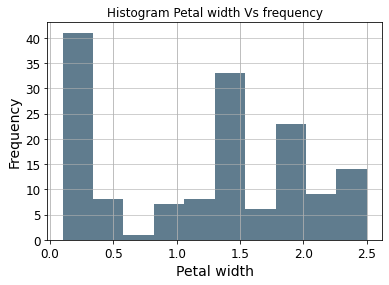

In [ ]:
# Generate data on commute times.
size, scale = 1000, 10
ptl_width = new_df['petal width (cm)']
#grid untuk garis kisi '-' disetiap sumbu atau axis, bins u/ jmlh pembagian bin 'histogram', rwidth = rentang dari setiap nilai
ptl_width.plot.hist(grid=True, bins=10, rwidth=1, color='#607c8e')
plt.title('Histogram Petal width Vs frequency')
plt.xlabel('Petal width')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

Kita menggunakan pandas function scatter matrix (fungsi pandas matrix pencar) untuk memvisualisasikan kumpulan data kita.

menggunakan df dan juga data target 'y' untuk dilakukan pemberian warna 'c'

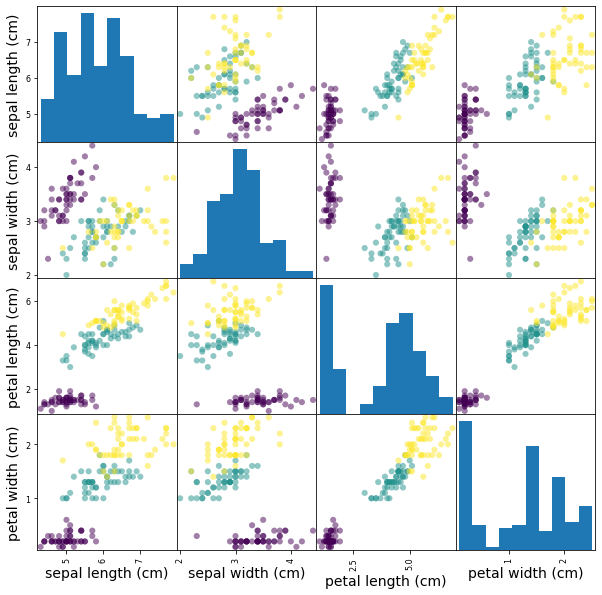

In [ ]:
matrix_scatter= pd.plotting.scatter_matrix(df,c=y, figsize= [10,10], s= 150) #bisa tambah ', marker='D' '

Hasilnya adalah matriks, yang pada diagonalnya terdapat histogram fitur yang sesuai dengan baris dan kolom. Gambar off-diagonal adalah scatter plots of the column feature versus row feature colored by the target variable (sebaran fitur kolom versus fitur baris yang diwarnai oleh variabel target). Ada banyak informasi dalam matriks pencar (scatter matrix) ini.

Lihat, gambar diatas, bahwa petal width and length are highly correlated (lebar dan panjang kelopak sangat berkorelasi), seperti yang Anda duga, dan bahwa bunga di klasifikasikan menurut spesies.

Selanjutnya split data

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV,StratifiedKFold

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify = y)

https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/

stratify Parameter ini membuat pemisahan sehingga proporsi nilai dalam sampel yang dihasilkan akan sama dengan proporsi nilai yang diberikan pada parameter stratify.

Misalnya, jika variabel yadalah variabel kategoris biner dengan nilai 0dan 1dan ada 25% dari nol dan 75% dari satu, stratify=yakan memastikan bahwa pemisahan acak Anda memiliki 25% yg 0 dan 75% yg 1.



In [ ]:
print(len(X_train)/len(X),len(X_test)/len(X))

0.8 0.2


In [ ]:
dt = DecisionTreeClassifier(max_depth= 2,random_state=1)

In [ ]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

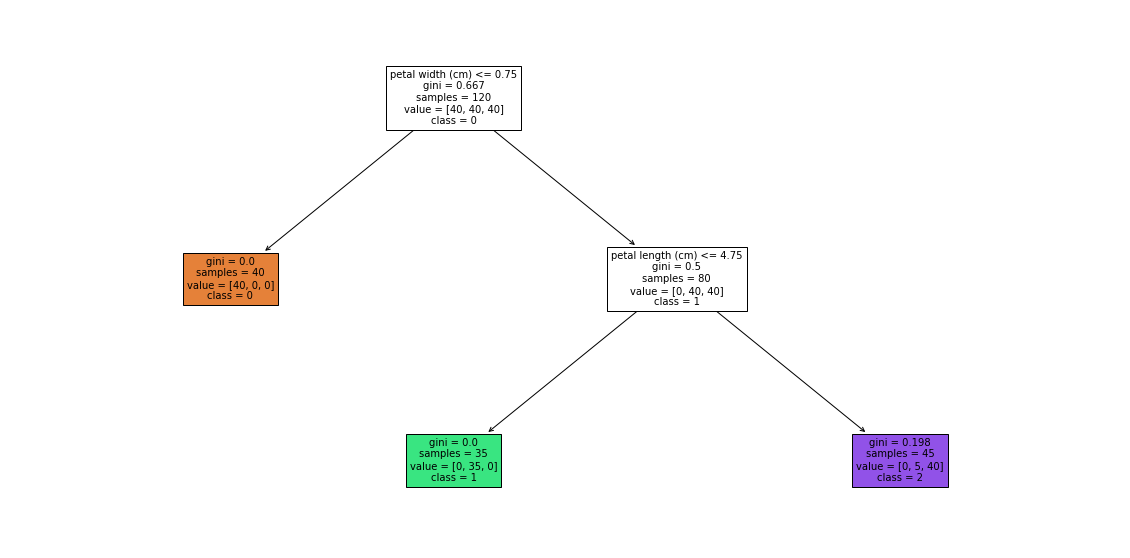

In [ ]:
plt.figure(figsize = (20, 10))
tree.plot_tree(
    dt, feature_names = X.columns, class_names=["0","1","2"], filled=True, fontsize = 10
)
plt.show()

In [ ]:
dt_pred_train = dt.predict(X_train)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, roc_curve

In [ ]:
print("Decision Tree\n", classification_report(y_train, dt_pred_train))

Decision Tree
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      0.88      0.93        40
           2       0.89      1.00      0.94        40

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120



In [ ]:
cm = confusion_matrix(y_train, dt_pred_train)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[40  0  0]
 [ 0 35  5]
 [ 0  0 40]]


In [ ]:
dt_pred_val = dt.predict(X_test)

In [ ]:
print("Decision Tree\n", classification_report(y_test, dt_pred_val))

Decision Tree
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [ ]:
print('Training set score: {:.4f}'.format(dt.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(dt.score(X_test, y_test)))

Training set score: 0.9583
Test set score: 0.9333


In [ ]:
cm = confusion_matrix(y_test, dt_pred_val)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


Hyperparameter Tuning

In [ ]:
params = {
    'min_samples_split' : np.arange(2,9),
    'max_depth' : np.arange(2,7)
}

dt = DecisionTreeClassifier(random_state=1)
#cv adalah nilai cross validation
dt_grid = GridSearchCV(dt, params, scoring ="accuracy", cv = 10, return_train_score=True)
dt_grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=1, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': array([2, 3, 4, 5, 6]),
                         'min_samples_split': array([2, 3, 4, 5,

Verbose adalah istilah pemrograman umum untuk menghasilkan banyak keluaran logging. Anda dapat menganggapnya sebagai meminta program untuk "memberi tahu saya segala sesuatu tentang apa yang Anda lakukan sepanjang waktu". Atur saja ke true dan lihat apa yang terjadi.

In [ ]:
# dt_hyperparam_df = pd.DataFrame(dt_grid.cv_results_)
# dt_hyperparam_df.sort_values("mean_test_score", ascending=False)[["params", "mean_test_score", "mean_train_score", "std_test_score", "std_train_score"]]

In [ ]:
print(f"Best Scores: {dt_grid.best_score_}")
print(f"Best Params: {dt_grid.best_params_}")

Best Scores: 0.9416666666666667
Best Params: {'max_depth': 3, 'min_samples_split': 2}


# Model Evaluation

In [ ]:
dt_best = dt_grid.best_estimator_
print(dt_best)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')


In [ ]:
dt_train_p = dt_best.predict(X_train)
dt_val_p = dt_best.predict(X_test)

In [ ]:
print("Decision Tree-TRAIN\n", classification_report(y_train, dt_train_p))
print("Decision Tree-VAL:\n", classification_report(y_test, dt_val_p))

Decision Tree-TRAIN
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.91      0.97      0.94        40
           2       0.97      0.90      0.94        40

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120

Decision Tree-VAL:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



https://www.kaggle.com/adityaecdrid/iris-dataset-classifying 0,1,2


In [ ]:
print("Decision Tree-TRAIN\n", confusion_matrix(y_train, dt_train_p))
print("Decision Tree-VAL:\n", confusion_matrix(y_test, dt_val_p))

Decision Tree-TRAIN
 [[40  0  0]
 [ 0 39  1]
 [ 0  4 36]]
Decision Tree-VAL:
 [[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]


https://www.pengalaman-edukasi.com/2020/11/menghitung-confusion-matrix-3-kelas.html

https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826

In [ ]:
print('Training set score: {:.4f}'.format(dt_best.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(dt_best.score(X_test, y_test)))

Training set score: 0.9583
Test set score: 0.9667


cara 2


In [ ]:
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# def print_score(clf, X_train, y_train, X_test, y_test, train=True):
#     if train:
#         pred = clf.predict(X_train)
#         clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
#         print("Train Result:\n================================================")
#         print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
#         print("_______________________________________________")
#         print(f"CLASSIFICATION REPORT:\n{clf_report}")
#         print("_______________________________________________")
#         print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
#     elif train==False:
#         pred = clf.predict(X_test)
#         clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
#         print("Test Result:\n================================================")        
#         print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
#         print("_______________________________________________")
#         print(f"CLASSIFICATION REPORT:\n{clf_report}")
#         print("_______________________________________________")
#         print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

https://stackoverflow.com/questions/32761556/python-scikit-learn-n-jobs

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import GridSearchCV

# cross_validation = StratifiedKFold(n_splits=10)
# params = {
#     "criterion":("gini", "entropy"), 
#     "splitter":("best", "random"), 
#     "max_depth":(list(range(1, 10))), 
#     "min_samples_split":[2, 3, 4], 
#     "min_samples_leaf":list(range(1, 10)), 
# }


# tree_clf = DecisionTreeClassifier(random_state=42)
# tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=cross_validation)
# tree_cv.fit(X_train, y_train)
# best_params = tree_cv.best_params_
# print(f"Best paramters: {best_params})")

# tree_clf = DecisionTreeClassifier(**best_params)
# tree_clf.fit(X_train, y_train)
# print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
# print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

# Model inference

In [ ]:
X.head(1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2


In [ ]:
new_data = [[5.1, 3.5, 1.5, 0.3]]

In [ ]:
new_prediction= dt_best.predict(new_data)
if new_prediction == [1.]:
  print("Prediction: {versicolor}")
elif new_prediction == [2.0]:
  print("Prediction: {virginica}")
else:
  print("Prediction: {setosa}")

Prediction: {setosa}


In [ ]:
dt_test_p = dt_best.predict(X_test)

In [ ]:
pd.DataFrame({
    "Actual": y_test,
    "Prediction": dt_test_p
})

,Actual,Prediction
107,2,2
9,0,0
98,1,1
11,0,0
43,0,0
0,0,0
148,2,2
111,2,2
121,2,2
76,1,1


# Boston

In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets

In [ ]:
boston = datasets.load_boston()
print('Dataset structure= ', dir(boston))

df = pd.DataFrame(boston.data, columns = boston.feature_names)
df['target'] = boston.target

df.sample(5)

Dataset structure=  ['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'target']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
135,0.55778,0.0,21.89,0.0,0.624,6.335,98.2,2.1107,4.0,437.0,21.2,394.67,16.96,18.1
406,20.71620,0.0,18.10,0.0,0.659,4.138,100.0,1.1781,24.0,666.0,20.2,370.22,23.34,11.9
253,0.36894,22.0,5.86,0.0,0.431,8.259,8.4,8.9067,7.0,330.0,19.1,396.90,3.54,42.8
396,5.87205,0.0,18.10,0.0,0.693,6.405,96.0,1.6768,24.0,666.0,20.2,396.90,19.37,12.5
445,10.67180,0.0,18.10,0.0,0.740,6.459,94.8,1.9879,24.0,666.0,20.2,43.06,23.98,11.8


In [ ]:
#Lets create feature matrix X  and y labels
X = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
y = df[['target']]

print('X shape=', X.shape)
print('y shape=', y.shape)

X shape= (506, 13)
y shape= (506, 1)


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 1)
print('X_train dimension= ', X_train.shape)
print('X_test dimension= ', X_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_train dimension= ', y_test.shape)

X_train dimension=  (404, 13)
X_test dimension=  (102, 13)
y_train dimension=  (404, 1)
y_train dimension=  (102, 1)


In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state= 1)
dtr.fit(X_train ,y_train)

DecisionTreeRegressor(random_state=1)

In [ ]:
dtr.score(X_test, y_test)

0.6762626452032452

In [ ]:
dtr.score(X_train, y_train)

1.0

In [ ]:
from sklearn.metrics import mean_squared_error 
y_pred = dtr.predict(X_test)
mean_squared_error(y_test, y_pred)

31.99411764705883

In [ ]:
y_pred_train = dtr.predict(X_train)
mean_squared_error(y_train, y_pred_train)

0.0

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {"criterion": ["absolute_error"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }

## Comment in order to publish in kaggle.

grid_cv_dtm = GridSearchCV(dtr, param_grid, cv=5)

grid_cv_dtm.fit(X,y)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=1),
             param_grid={'criterion': ['absolute_error'],
                         'max_depth': [2, 6, 8], 'max_leaf_nodes': [5, 20, 100],
                         'min_samples_leaf': [20, 40, 100],
                         'min_samples_split': [10, 20, 40]})

In [ ]:
print("Best Score:{}".format(grid_cv_dtm.best_score_))
print("Best Hyperparameters:\n{}".format(grid_cv_dtm.best_params_))

Best Score:0.43076914203986616
Best Hyperparameters:
{'criterion': 'absolute_error', 'max_depth': 8, 'max_leaf_nodes': 20, 'min_samples_leaf': 20, 'min_samples_split': 10}


In [ ]:
best_dtm = grid_cv_dtm.best_estimator_
best_dtm.score(X_test, y_test)

0.8442471551453562

In [ ]:
best_dtm.score(X_train, y_train)

0.7611417896533291

In [ ]:
y_pred_test2 = best_dtm.predict(X_test)
mean_squared_error(y_test, y_pred_test2)

15.39264705882353

In [ ]:
y_pred_train2 = best_dtm.predict(X_train)
mean_squared_error(y_train, y_pred_train2)

19.295297029702972

In [ ]:
X_train.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
42,0.14150,0.0,6.91,0.0,0.448,6.169,6.6,5.7209,3.0,233.0,17.9,383.37,5.81
58,0.15445,25.0,5.13,0.0,0.453,6.145,29.2,7.8148,8.0,284.0,19.7,390.68,6.86


In [ ]:
new_data = [[0.15, 25 ,5.13, 0.0, 0.453, 6.145, 29.2, 7.8148, 8.0, 284, 19.7, 390.6, 6.86]]

In [ ]:
best_dtm.predict(new_data)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([23.1])

In [ ]:
y_pred_test2

array([29.8 , 27.95, 19.8 , 20.45, 19.5 , 21.35, 27.95, 19.55, 19.8 ,
       24.2 , 27.95, 34.05, 19.5 , 19.5 , 20.55, 19.5 , 10.2 , 46.35,
       23.1 , 13.3 , 19.5 , 15.6 , 24.2 , 24.4 , 23.1 , 10.2 , 13.3 ,
       20.45, 46.35, 13.3 , 27.95, 19.8 , 46.35, 14.4 , 20.45, 22.2 ,
       14.4 , 34.05, 10.2 , 19.55, 23.1 , 23.1 , 27.95, 13.3 , 14.4 ,
       29.8 , 46.35, 10.2 , 20.55, 21.35, 29.8 , 21.35, 23.1 , 21.35,
       17.5 , 23.1 , 13.3 , 24.4 , 19.55, 46.35, 14.4 , 27.95, 13.3 ,
       14.4 , 19.8 , 34.05, 46.35, 24.2 , 20.45, 20.55, 24.4 , 10.2 ,
       19.5 , 21.35, 19.55, 19.5 , 34.05, 24.2 , 24.4 , 34.05, 17.5 ,
       20.55, 34.05, 13.3 , 23.1 , 23.1 , 13.3 , 24.4 , 19.5 , 17.5 ,
       29.8 , 46.35, 17.5 , 20.45, 19.55, 19.55, 24.2 , 24.2 , 46.35,
       22.2 , 10.2 , 14.4 ])

In [ ]:
y_test

,target
307,28.2
343,23.9
47,16.6
67,22.0
362,20.8
...,...
92,22.9
224,44.8
110,21.7
426,10.2


In [ ]:
predicted_price= pd.DataFrame(best_dtm.predict(X_test), columns=['Predicted Price'])
actual_price = pd.DataFrame(y_test, columns=['target'])
actual_price = actual_price.reset_index(drop=True) # Drop the index so that we can concat it, to create new dataframe
df_actual_vs_predicted = pd.concat([actual_price,predicted_price],axis =1)
df_actual_vs_predicted.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101
target,28.2,23.90,16.6,22.00,20.8,23.00,27.90,14.50,21.5,22.6,23.70,31.20,19.3,19.4,19.40,27.9,13.9,50.00,24.1,14.6,16.2,15.6,23.8,25.0,23.5,8.3,13.5,17.50,43.10,11.5,24.10,18.5,50.00,12.6,19.80,24.5,14.9,36.20,11.9,19.10,...,8.5,14.5,23.7,37.20,41.70,16.5,21.70,22.70,23.0,10.5,21.9,21.00,20.40,21.8,50.00,22.0,23.3,37.30,18.0,19.20,34.90,13.4,22.9,22.5,13.0,24.6,18.3,18.1,23.9,50.00,13.6,22.90,10.90,18.90,22.4,22.9,44.80,21.7,10.2,15.4
Predicted Price,29.8,27.95,19.8,20.45,19.5,21.35,27.95,19.55,19.8,24.2,27.95,34.05,19.5,19.5,20.55,19.5,10.2,46.35,23.1,13.3,19.5,15.6,24.2,24.4,23.1,10.2,13.3,20.45,46.35,13.3,27.95,19.8,46.35,14.4,20.45,22.2,14.4,34.05,10.2,19.55,...,13.3,14.4,19.8,34.05,46.35,24.2,20.45,20.55,24.4,10.2,19.5,21.35,19.55,19.5,34.05,24.2,24.4,34.05,17.5,20.55,34.05,13.3,23.1,23.1,13.3,24.4,19.5,17.5,29.8,46.35,17.5,20.45,19.55,19.55,24.2,24.2,46.35,22.2,10.2,14.4
